In [226]:
import pandas as pd
import numpy as np
import json
import gzip
import re
import os
import sys

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [157]:
df_book = pd.read_json('data/goodreads_books_fantasy_paranormal.json', lines=True)

In [158]:
df_book

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,1934876569,6,[151854],US,,"[{'count': '515', 'name': 'to-read'}, {'count'...",,false,4.22,,...,3,,2009,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...
2,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,...,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
3,,1,[147734],US,,"[{'count': '1057', 'name': 'to-read'}, {'count...",B0056A00P4,true,4.04,B0056A00P4,...,,,,https://www.goodreads.com/book/show/12182387-t...,https://s.gr-assets.com/assets/nophoto/book/11...,12182387,4,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
4,,21,[811663],US,en-US,"[{'count': '598', 'name': 'to-read'}, {'count'...",B01BLJGA9S,true,4.23,B01BLJGA9S,...,,,,https://www.goodreads.com/book/show/29074693-p...,https://s.gr-assets.com/assets/nophoto/book/11...,29074693,149,46079519,"Prowled Darkness (Dante's Circle, #7)","Prowled Darkness (Dante's Circle, #7)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258580,1619218909,4,[528601],US,eng,"[{'count': '49', 'name': 'to-read'}, {'count':...",,true,4.38,,...,11,,2013,https://www.goodreads.com/book/show/18202473-s...,https://images.gr-assets.com/books/1373995821m...,18202473,11,25613710,"Soul Chase (Dark Souls, #3)","Soul Chase (Dark Souls, #3)"
258581,1475973500,1,[497953],US,,"[{'count': '10', 'name': 'to-read'}, {'count':...",,false,5.00,B01M1G36M3,...,2,,2013,https://www.goodreads.com/book/show/17397840-u...,https://images.gr-assets.com/books/1361564596m...,17397840,1,24220340,"Unforgotten, Volume I (The Resurrection Tower,...","Unforgotten, Volume I (The Resurrection Tower,..."
258582,,4,[],US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",B00OEK0HQE,true,4.24,B00OEK0HQE,...,9,,2014,https://www.goodreads.com/book/show/23363286-d...,https://images.gr-assets.com/books/1413258573m...,23363286,15,42919549,Dead Endings,Dead Endings
258583,,7,[],US,eng,"[{'count': '36', 'name': 'to-read'}, {'count':...",,true,4.00,,...,9,,2014,https://www.goodreads.com/book/show/23252156-w...,https://images.gr-assets.com/books/1411156827m...,23252156,16,42794368,Wicked Reflection,Wicked Reflection


# Exploratory Data Analysis

In [159]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258585 entries, 0 to 258584
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  258585 non-null  object 
 1   text_reviews_count    258585 non-null  int64  
 2   series                258585 non-null  object 
 3   country_code          258585 non-null  object 
 4   language_code         258585 non-null  object 
 5   popular_shelves       258585 non-null  object 
 6   asin                  258585 non-null  object 
 7   is_ebook              258585 non-null  object 
 8   average_rating        258585 non-null  float64
 9   kindle_asin           258585 non-null  object 
 10  similar_books         258585 non-null  object 
 11  description           258585 non-null  object 
 12  format                258585 non-null  object 
 13  link                  258585 non-null  object 
 14  authors               258585 non-null  object 
 15  

Check out a sample description.

In [161]:
print(df_book['title'][2021])
print(df_book['description'][2021])

White Witch, Black Curse
Kick-ass witch and bounty hunter Rachel Morgan lost her lover, and now she wont rest until his murder is solved and avenged. But the road to hell is paved with good intentions, and Rachels past comes back to haunt herliterally.


### Pickle df_book for 

In [164]:
req_columns = ['book_id','title','popular_shelves', 'description', 'authors', 'average_rating', 'ratings_count', 'url', 'image_url']

In [165]:
book_pk = df_book[req_columns]

In [166]:
'''
filename = 'book_info'
outfile = open(filename,'wb')
pickle.dump(book_pk,outfile)
outfile.close()

'''

## Rating Count

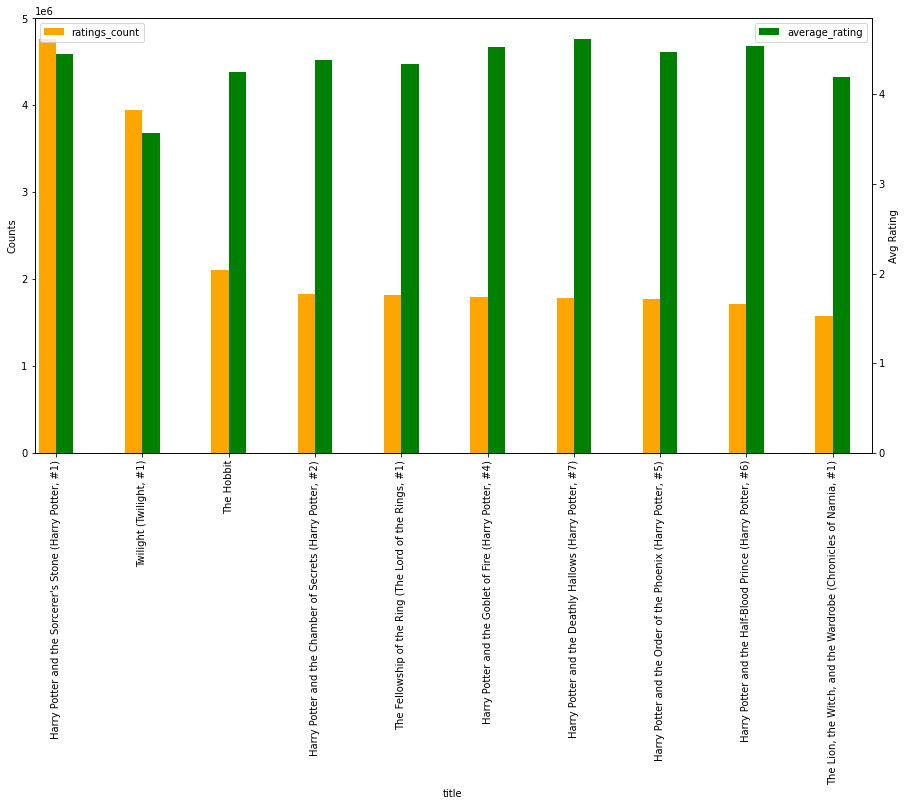

In [222]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

avg_rating = df_book[['title','ratings_count', 'average_rating']]
avg_rating = avg_rating.sort_values(by='ratings_count', ascending=False)[:10].set_index('title')



avg_rating['ratings_count'].plot(kind='bar', color='orange', ax=ax, width=width, position=1, legend='Counts')
avg_rating['average_rating'].plot( kind='bar', color='green', ax=ax2, width=width, position=0, legend='Avg Rating')

ax.set_ylabel('Counts')
ax2.set_ylabel('Avg Rating')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax.bar(x-0.4, avg_rating['ratings_count'], width=0.4, label='Rating Counts')
#ax.bar(x+0.4, avg_rating['average_rating'],width=0.4, label='Avg Rating')

#ax.set_xticklabels(avg_rating['title'], rotation=90)

#ax.bar(avg_rating['average_rating'], avg_rating['ratings_count'])

In [192]:
avg_rating.sort_values(by='ratings_count', ascending=False)[:10]

,title,ratings_count,average_rating
173961,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,4.45
63913,"Twilight (Twilight, #1)",3941381,3.57
88287,The Hobbit,2099680,4.25
196958,Harry Potter and the Chamber of Secrets (Harry...,1821802,4.38
239674,The Fellowship of the Ring (The Lord of the Ri...,1813229,4.34
246719,Harry Potter and the Goblet of Fire (Harry Pot...,1792561,4.53
178868,Harry Potter and the Deathly Hallows (Harry Po...,1784684,4.62
228269,Harry Potter and the Order of the Phoenix (Har...,1766895,4.47
94272,Harry Potter and the Half-Blood Prince (Harry ...,1713866,4.54
184105,"The Lion, the Witch, and the Wardrobe (Chronic...",1575387,4.19


## Word Count Distribution 

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

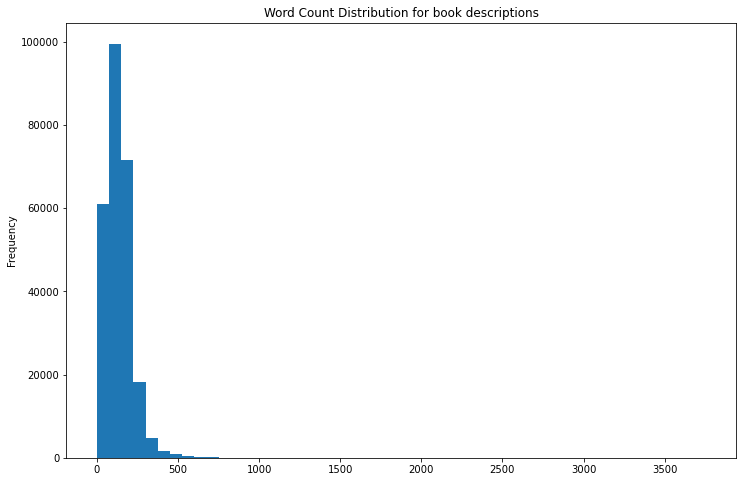

In [168]:
# Calculating the word count for book description
df_book['word_count'] = df_book['description'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df_book['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

## Part-of-speech tags Distribution in book descriptions

In [224]:
!pip install textblob

<AxesSubplot:title={'center':'Top 20 Part-of-speech tagging for comments'}>

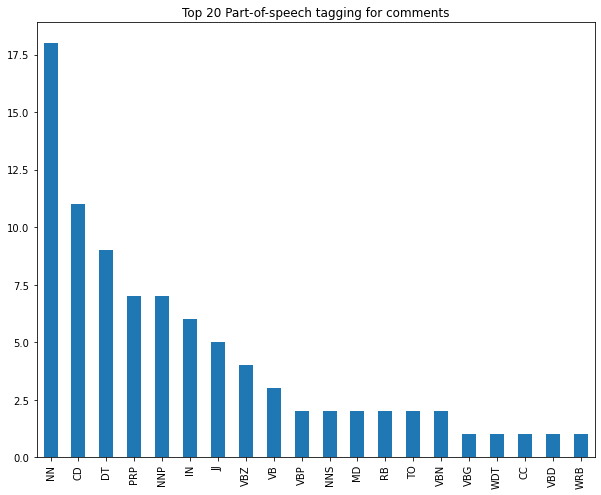

In [225]:
from textblob import TextBlob
blob = TextBlob(str(df_book['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

## Bigram Distribution 

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

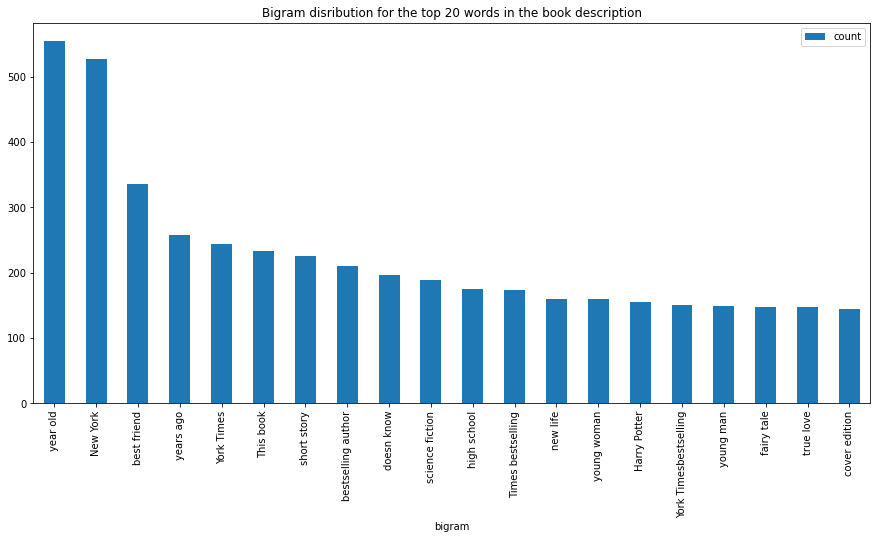

In [227]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df_book['description'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

## Trigram Distribution 

<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

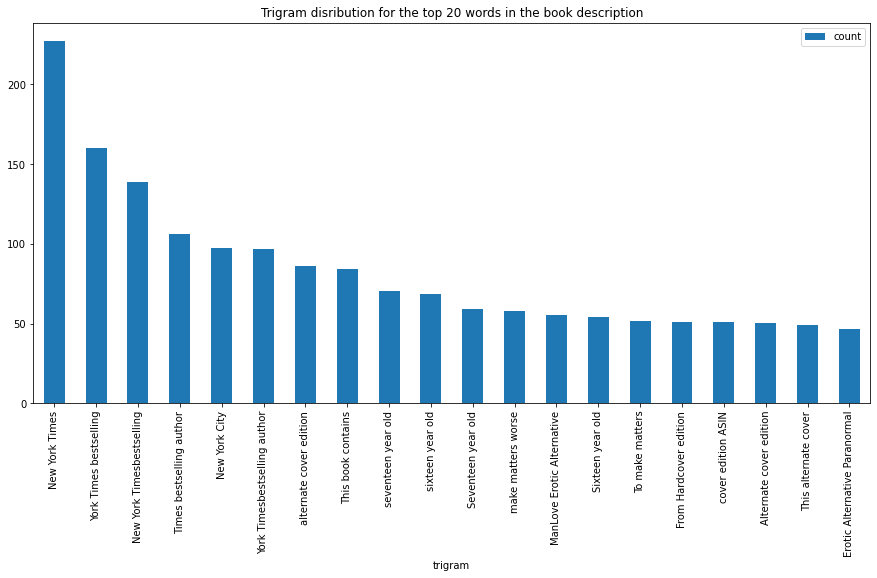

In [228]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df_book['description'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [58]:
def load_data(file_name, head = 50000):
    count = 0
    data = []
    with open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if (d['is_read'] == True) and (d['rating']!=0):
                count += 1
                data.append(d)
            else:
                continue
            
            # break if reaches limit line
            if (head is not None) and (count > head):
                break
    return data

In [59]:
interactions = load_data('data/goodreads_interactions_fantasy_paranormal.json')

In [60]:
interactions

[{'user_id': '8842281e1d1347389f2ab93d60773d4d',
  'book_id': '18245960',
  'review_id': 'dfdbb7b0eb5a7e4c26d59a937e2e5feb',
  'is_read': True,
  'rating': 5,
  'review_text_incomplete': 'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. <br /><br /> It is a 2015 Hugo winner, and translate...',
  'date_added': 'Sun Jul 30 07:44:10 -0700 2017',
  'date_updated': 'Wed Aug 30 00:00:26 -0700 2017',
  'read_at': 'Sat Aug 26 12:05:52 -0700 2017',
  'started_at': 'Tue Aug 15 13:23:18 -0700 2017'},
 {'user_id': '8842281e1d1347389f2ab93d60773d4d',
  'book_id': '29058155',
  'review_id': '3759ba2b18dd09eb5e844a116f0ce06a',
  'is_read': True,
  'rating': 3,
  'review_text_incomplete': '',
  'date_added': 'Mon Jul 25 14:29:33 -0700 2016',
  'date_updated': 'Tue Dec 13 11:00:02 -0800 2016',
  'r

In [61]:
df_inter = pd.DataFrame(interactions)

In [62]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 50001 non-null  object
 1   book_id                 50001 non-null  object
 2   review_id               50001 non-null  object
 3   is_read                 50001 non-null  bool  
 4   rating                  50001 non-null  int64 
 5   review_text_incomplete  50001 non-null  object
 6   date_added              50001 non-null  object
 7   date_updated            50001 non-null  object
 8   read_at                 50001 non-null  object
 9   started_at              50001 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 3.5+ MB


In [96]:
df_inter.describe()

,rating
count,50001.000000
mean,3.954181
std,0.961041
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [63]:
df_inter.sample(10)

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
32520,120f62524cde1989e14890e5bc103578,496146,d1488e63eb1f8ff4e0a4e8b526b941b0,True,3,,Mon Mar 28 14:00:24 -0700 2011,Mon Mar 28 14:00:24 -0700 2011,,
49561,91eb0f8d12bcc01204862181f3e2b3b2,830942,6ee57f81fef8850832b47b53558d2f6b,True,5,,Mon Jan 28 15:30:34 -0800 2013,Mon Jan 28 15:30:02 -0800 2013,,
34820,8d94ec26a0b328c0e17f640353ae4a69,58155,b23b5c0d98190348b83e93d426d6c3f6,True,4,,Tue Dec 11 12:06:49 -0800 2012,Tue Dec 11 12:06:49 -0800 2012,,
30863,4b439e428b728e4f3dc49ad804c8c6d9,30248,73a8c690b31d1f13434491030809a4fe,True,5,,Wed Jun 06 16:30:22 -0700 2012,Wed Jun 06 16:30:22 -0700 2012,,
19926,f2f61ff7f4ed044514e59836062acb9d,38619,c621e8da486f7a6eaa470ebdcae78c97,True,4,,Mon Jun 11 10:50:56 -0700 2012,Mon Jun 11 10:51:05 -0700 2012,,
41042,66d8ca33143d9bf2c3fd45ffccc08730,10572,ba9dae5931ca9ed8e02a18d49bf5f616,True,5,,Sat Jun 01 13:44:16 -0700 2013,Sat Jun 01 13:44:16 -0700 2013,,
2428,428e8f6094aed8d36b7663e3ccf43997,9912786,f5368344b84a700e2a2dc377cae26596,True,5,,Thu Jan 03 16:20:49 -0800 2013,Sat Feb 09 14:10:18 -0800 2013,,
35849,49d2875a328d839e22a49d4c7a954907,1421990,d3545e58d7ebb080392b441906276741,True,3,,Mon Jun 10 12:02:28 -0700 2013,Mon Jun 10 12:02:28 -0700 2013,,
9179,fc40e92613e282a797633316d224192b,248470,5bae17204afec1fa2aa8f56bba210306,True,5,,Tue Jun 05 12:01:44 -0700 2012,Tue Jun 05 12:01:44 -0700 2012,,
20235,de40b6f69f6d9269335bebd57d2ce9bd,24946854,0ac471a4ca41f1005c02cb64531b6f55,True,1,,Fri Jan 27 14:25:40 -0800 2017,Tue Jan 31 16:02:00 -0800 2017,Tue Jan 31 00:00:00 -0800 2017,Sat Jan 28 00:00:00 -0800 2017


In [64]:
df_inter['user_id'].value_counts()

2072483ab40c0d43a83f8bcede5f92c7    733
caa4c5b1fbc69e0b7d38c1b86e377923    643
34b3d1f3626eaa8b6d075df95ac65268    641
8e596b88d0516977c8a70644e3fa2f53    634
453e6a280947ac1f82a27b91e5fb89bb    617
                                   ... 
bf4cd8c065f9b11ba59dfcc196572f7a      1
5e78cb844a823dbe45e304b846b043f6      1
8035b626a4398a7a734e2a5371d0c3f0      1
4e45a9bdb1d36d9a8c901f2bf47db047      1
cd16103728a569054b22a4eb682cb2c4      1
Name: user_id, Length: 881, dtype: int64

In [71]:
df_inter.groupby('user_id').nunique()

,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
user_id,,,,,,,,,
0097fcaad4be6976a4e91410cf300b3b,5,5,1,2,1,5,5,5,4
012515e5802b2e0f42915118c90fa04b,129,129,1,4,35,128,129,85,48
012aa353140af13109d00ca36cdc0637,30,30,1,5,2,30,30,5,2
0147285ddc6b8a9ae27f1829a0bac33a,5,5,1,3,1,5,5,2,2
015cb45454dc70dfc692eb17745fc6c0,77,77,1,4,3,77,77,68,29
...,...,...,...,...,...,...,...,...,...
fe899820b2beda4005fac3aa31c54c08,43,43,1,5,1,43,43,6,5
fe98878f73553cc022af2a3ef0bb56b4,71,71,1,5,4,71,71,30,27
fed1d27323bb1994b8a28d82b1a29fce,2,2,1,2,1,2,2,2,2


In [112]:
df_inter.astype({'book_id': 'int64'}).dtypes

user_id                   object
book_id                    int64
review_id                 object
is_read                     bool
rating                     int64
review_text_incomplete    object
date_added                object
date_updated              object
read_at                   object
started_at                object
dtype: object

In [116]:
indx = df_inter.groupby('user_id').count().reset_index()

In [118]:
def getIndex(user):
    return indx.index[indx['user_id'] == user][0]

In [120]:
df_inter['user_id_num'] = df_inter['user_id'].map(getIndex)

In [121]:
df_inter

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at,user_id_num
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,True,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,472
1,8842281e1d1347389f2ab93d60773d4d,29058155,3759ba2b18dd09eb5e844a116f0ce06a,True,3,,Mon Jul 25 14:29:33 -0700 2016,Tue Dec 13 11:00:02 -0800 2016,Sat Aug 20 00:00:00 -0700 2016,Wed Aug 17 00:00:00 -0700 2016,472
2,8842281e1d1347389f2ab93d60773d4d,186074,1d12addadc0c737dcd29c362c936a266,True,5,,Tue Jul 12 19:21:10 -0700 2016,Wed Mar 22 11:47:46 -0700 2017,,,472
3,8842281e1d1347389f2ab93d60773d4d,15839976,c7baa53f6f7d554ed9c3859f0d400d19,True,5,,Tue May 10 11:34:44 -0700 2016,Wed Mar 22 11:47:45 -0700 2017,,,472
4,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,True,5,A beautiful story. Neil Gaiman is truly a uniq...,Wed Sep 24 09:29:29 -0700 2014,Wed Oct 01 00:31:56 -0700 2014,Tue Sep 30 00:00:00 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,472
...,...,...,...,...,...,...,...,...,...,...,...
49996,6ee66de8932268e0d157e34a9d1b1e24,8715032,70228995a0397c41c5fe9ebe09a0e453,True,2,,Thu Jun 07 16:43:36 -0700 2012,Thu Jun 07 22:14:14 -0700 2012,,,380
49997,6ee66de8932268e0d157e34a9d1b1e24,12866426,8ab675e54587a86848a43560c5263632,True,4,,Thu Jun 07 16:43:35 -0700 2012,Thu Jun 07 22:14:23 -0700 2012,,,380
49998,6ee66de8932268e0d157e34a9d1b1e24,10429025,c409b01dab2f6a7748d1c54e270789f9,True,5,,Thu Jun 07 16:40:40 -0700 2012,Thu Jun 07 22:14:38 -0700 2012,,,380
49999,6ee66de8932268e0d157e34a9d1b1e24,10890808,2ea7ac1d35a6761f7ed05aeac995029d,True,3,,Thu Jun 07 16:40:40 -0700 2012,Thu Jun 07 22:14:33 -0700 2012,,,380


In [123]:
df_inter.sort_values(by='user_id_num', inplace=True)

In [124]:
df_inter['book_id'].value_counts()

3           432
41865       340
15881       316
136251      307
2           303
           ... 
1330620       1
14058817      1
14740456      1
9513722       1
11857013      1
Name: book_id, Length: 17034, dtype: int64

In [125]:
df_inter['rating'].value_counts()

4    18827
5    16688
3    10809
2     2861
1      816
Name: rating, dtype: int64

In [131]:
count = df_inter['rating'].value_counts()

Text(0.5, 1.0, 'Distribution of Ratings by users')

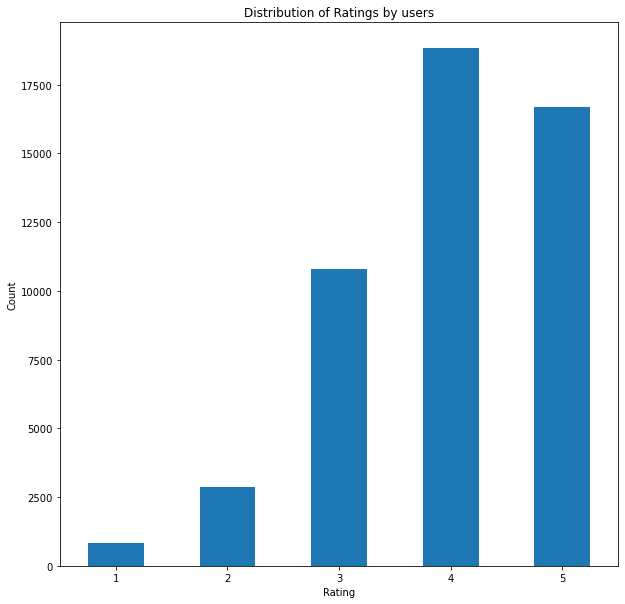

In [229]:
fig, ax = plt.subplots(figsize=(10,10))
count = df_inter['rating'].value_counts().sort_index()
#sns.barplot(x="rating", kde=False, binwidth=0.8)
count.plot(kind='bar', use_index=True, ax=ax)
ax.set_ylabel('Count')
ax.set_xticklabels(count.index, rotation=0)
ax.set_xlabel('Rating')

ax.set_title('Distribution of Ratings by users')

<ipython-input-248-08e2586d93ab>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(raters.index), rotation=0)


[Text(-2.5, 0, '116'),
 Text(0.0, 0, '694'),
 Text(2.5, 0, '175'),
 Text(5.0, 0, '506'),
 Text(7.5, 0, '233'),
 Text(10.0, 0, '831'),
 Text(12.5, 0, '408'),
 Text(15.0, 0, '250'),
 Text(17.5, 0, '851'),
 Text(20.0, 0, '326'),
 Text(22.5, 0, '768')]

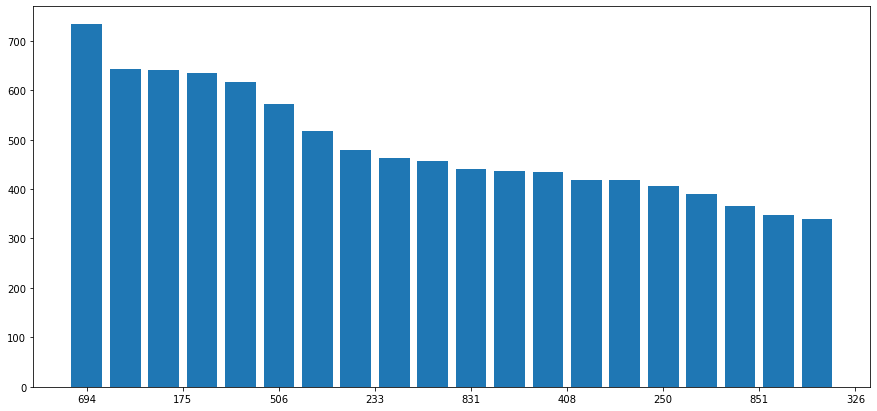

In [248]:
fig, ax = plt.subplots(figsize=(15,7))

raters = df_inter['user_id_num'].value_counts().head(20)
#ax.barh(y=raters.index, width=raters.values)
ax.bar(x =range(20), height=raters.values)
ax.set_xticklabels(list(raters.index), rotation=0)

In [241]:
raters = df_inter['user_id_num'].value_counts().head(20)
raters.index

Int64Index([116, 694, 175, 506, 233, 831, 408, 250, 851, 326, 768, 360, 245,
            395, 337, 263, 315, 248, 514, 828],
           dtype='int64')

In [232]:
df_inter = df_inter.astype({'book_id': 'int64'})

In [234]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50001 entries, 29039 to 47833
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 50001 non-null  object
 1   book_id                 50001 non-null  int64 
 2   review_id               50001 non-null  object
 3   is_read                 50001 non-null  bool  
 4   rating                  50001 non-null  int64 
 5   review_text_incomplete  50001 non-null  object
 6   date_added              50001 non-null  object
 7   date_updated            50001 non-null  object
 8   read_at                 50001 non-null  object
 9   started_at              50001 non-null  object
 10  user_id_num             50001 non-null  int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 4.2+ MB


In [249]:
import pickle 

In [250]:
inter_pk = df_inter[['user_id_num', 'book_id', 'rating']]

In [251]:
filename = 'interact'
outfile = open(filename,'wb')
pickle.dump(inter_pk,outfile)
outfile.close()